In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.metrics import mean_squared_error,r2_score

In [27]:
from joblib import dump,load

In [3]:
df=pd.read_csv("https://raw.githubusercontent.com/digipodium/Datasets/main/regression/50_Startups.csv")

In [4]:
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [6]:
df.columns

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'State', 'Profit'], dtype='object')

In [7]:
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [8]:
enc=OneHotEncoder(drop='first')
dummy=enc.fit_transform(df[['State']]).toarray()
df=pd.concat([pd.DataFrame(dummy),df],axis=1)

In [9]:
df.head()

,0,1,R&D Spend,Administration,Marketing Spend,State,Profit
0,0.0,1.0,165349.20,136897.80,471784.10,New York,192261.83
1,0.0,0.0,162597.70,151377.59,443898.53,California,191792.06
2,1.0,0.0,153441.51,101145.55,407934.54,Florida,191050.39
3,0.0,1.0,144372.41,118671.85,383199.62,New York,182901.99
4,1.0,0.0,142107.34,91391.77,366168.42,Florida,166187.94


In [10]:
df.columns=df.columns.astype(str)

In [11]:
df.columns

Index(['0', '1', 'R&D Spend', 'Administration', 'Marketing Spend', 'State',
       'Profit'],
      dtype='object')

Training


In [13]:
x=df.drop(columns=['State','Profit'])
y=df['Profit']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [14]:
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

In [15]:
model=LinearRegression()
model.fit(x_train,y_train)
ypred=model.predict(x)

c:\ProgramData\anaconda\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


In [16]:
r2_score(y_test,model.predict(x_test))

0.8987266414319837

In [18]:
mean_squared_error(y,ypred)

1.5026321681628285e+19

In [19]:
model.score(x_test,y_test)

0.8987266414319837

In [21]:
df['pred']=model.predict(scaler.transform(x))
df.head()

,0,1,R&D Spend,Administration,Marketing Spend,State,Profit,pred
0,0.0,1.0,165349.20,136897.80,471784.10,New York,192261.83,191913.727404
1,0.0,0.0,162597.70,151377.59,443898.53,California,191792.06,187861.478390
2,1.0,0.0,153441.51,101145.55,407934.54,Florida,191050.39,183805.404267
3,0.0,1.0,144372.41,118671.85,383199.62,New York,182901.99,173623.190356
4,1.0,0.0,142107.34,91391.77,366168.42,Florida,166187.94,174098.252026


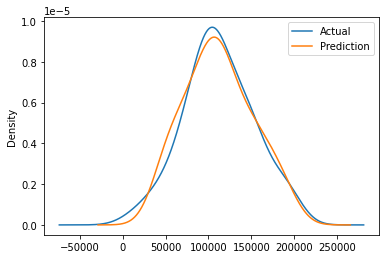

In [24]:
df['Profit'].plot(kind='kde',label='Actual')
df['pred'].plot(kind='kde',label='Prediction')
plt.legend()
plt.show()

In [25]:
px.line(df,y=['Profit','pred'],title="Actualprofitprediciton")

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'hovertemplate': 'variable=Profit<br>index=%{x}<br>value=%{y}<extra></extra>',
              'legendgroup': 'Profit',
              'line': {'color': '#636efa', 'dash': 'solid'},
              'marker': {'symbol': 'circle'},
              'mode': 'lines',
              'name': 'Profit',
              'orientation': 'v',
              'showlegend': True,
              'type': 'scatter',
              'x': array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
                          18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
                          36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49], dtype=int64),
              'xaxis': 'x',
              'y': array([192261.83, 191792.06, 191050.39, 182901.99, 166187.94, 156991.12,
                          156122.51, 155752.6 , 152211.77, 149759.96, 146121.95, 144259.4 ,
                          141585.52, 134307.35, 132602.65, 129917.04, 126992.93, 125370.37,
                          124266.9 , 122776.86, 118474.03, 111313.02, 110352.25, 108733.99,
                          108552.04, 107404.34, 105733.54, 105008.31, 103282.38, 101004.64,
                           99937.59,  97483.56,  97427.84,  96778.92,  96712.8 ,  96479.51,
                           90708.19,  89949.14,  81229.06,  81005.76,  78239.91,  77798.83,
                           71498.49,  69758.98,  65200.33,  64926.08,  49490.75,  42559.73,
                           35673.41,  14681.4 ]),
              'yaxis': 'y'},
             {'hovertemplate': 'variable=pred<br>index=%{x}<br>value=%{y}<extra></extra>',
              'legendgroup': 'pred',
              'line': {'color': '#EF553B', 'dash': 'solid'},
              'marker': {'symbol': 'circle'},
              'mode': 'lines',
              'name': 'pred',
              'orientation': 'v',
              'showlegend': True,
              'type': 'scatter',
              'x': array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
                          18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
                          36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49], dtype=int64),
              'xaxis': 'x',
              'y': array([191913.7274038 , 187861.47839007, 183805.40426665, 173623.19035616,
                          174098.25202606, 164246.36680458, 156165.84489947, 159597.70047229,
                          150220.99659011, 155019.87822287, 136305.2407773 , 136274.54962586,
                          129287.25932268, 126362.87908252, 148486.45402739, 145679.58311302,
                          116405.47712513, 128750.48288497, 129833.75780392, 113097.42524437,
                          116544.51129346, 115558.98201737, 115188.84018874, 111197.68506734,
                          113471.56812701, 100643.24281644, 109741.350327  , 113876.00520371,
                           99143.48842753,  99560.68684705,  99677.49425155,  95418.08570235,
                           97599.275746  ,  98993.33790342,  86876.30432577,  91390.89209802,
                           75324.0220735 ,  91886.85822604,  71327.34640771,  84608.45383643,
                           74197.75183475,  76521.47893717,  70875.84128325,  58825.43932911,
                           62092.25276442,  46357.46068582,  56930.33870602,  44712.3085635 ,
                           50912.41741905,  47329.63344539]),
              'yaxis': 'y'}],
    'layout': {'legend': {'title': {'text': 'variable'}, 'tracegroupgap': 0},
               'template': '...',
               'title': {'text': 'Actualprofitprediciton'},
               'xaxis': {'anchor': 'y', 'domain': [0.0, 1.0], 'title': {'text': 'index'}},
               'yaxis': {'anchor': 'x', 'domain': [0.0, 1.0], 'title': {'text': 'value'}}}
})

In [31]:
model_dict={'state_enc':enc,'scaler':scaler,'model':model,'desc':'Startupprofilepredicitonmodel'}
dump(model_dict,'../../model/profit.pk')

['../../model/profit.pk']

Prediciton

In [32]:
load_model=load('../../model/profit.pk')

In [33]:
en=load_model['state_enc']
sc=load_model['scaler']
mo=load_model['model']

In [35]:
rnd=float(input("enter rnd spend"))
adm=float(input("enetr admin"))
ms=float(input("enter Markseting spend"))
ste=input("enter state:[New York,California,Florida]")

In [37]:
dummy=en.transform([[ste]]).toarray()
inp=np.array([rnd,adm,ms]).reshape(1,-1)
inp=np.concatenate((dummy,inp),axis=1)
scale_input=sc.transform(inp)
profit=mo.predict(scale_input)[0]
print(profit)


94363.43660671994


c:\ProgramData\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning:

X does not have valid feature names, but OneHotEncoder was fitted with feature names

c:\ProgramData\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

